In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision.transforms import ToTensor
from PIL import Image
import io

import os
from torchvision.io.image import read_image
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image
from PIL import ImageFont, ImageDraw
from IPython.display import display
import regex as re
from torchvision.utils import make_grid
import torchvision


# Importing the Models and their respective weights
from torchvision.models.detection import (
    # Faster R-CNN
    fasterrcnn_resnet50_fpn_v2,
    FasterRCNN_ResNet50_FPN_V2_Weights,
)



In [3]:
from utils import show_mask, show_points, show_box, show_anns_ours, run_ours_box_or_points

In [4]:
os.chdir("EfficientSAM")

In [5]:
from efficient_sam.build_efficient_sam import build_efficient_sam_vitt, build_efficient_sam_vits
import zipfile

efficient_sam_vitt_model = build_efficient_sam_vitt()
efficient_sam_vitt_model.eval()

# Since EfficientSAM-S checkpoint file is >100MB, we store the zip file.
with zipfile.ZipFile("weights/efficient_sam_vits.pt.zip", 'r') as zip_ref:
    zip_ref.extractall("weights")
efficient_sam_vits_model = build_efficient_sam_vits()
efficient_sam_vits_model.eval()

EfficientSam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 384, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=384, out_features=1152, bias=True)
          (proj): Linear(in_features=384, out_features=384, bias=True)
        )
        (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=384, out_features=1536, bias=True)
          (act): GELU(approximate='none')
          (fc2): Linear(in_features=1536, out_features=384, bias=True)
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(384, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()
    

In [6]:
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()
# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

(-0.5, 1023.5, 737.5, -0.5)

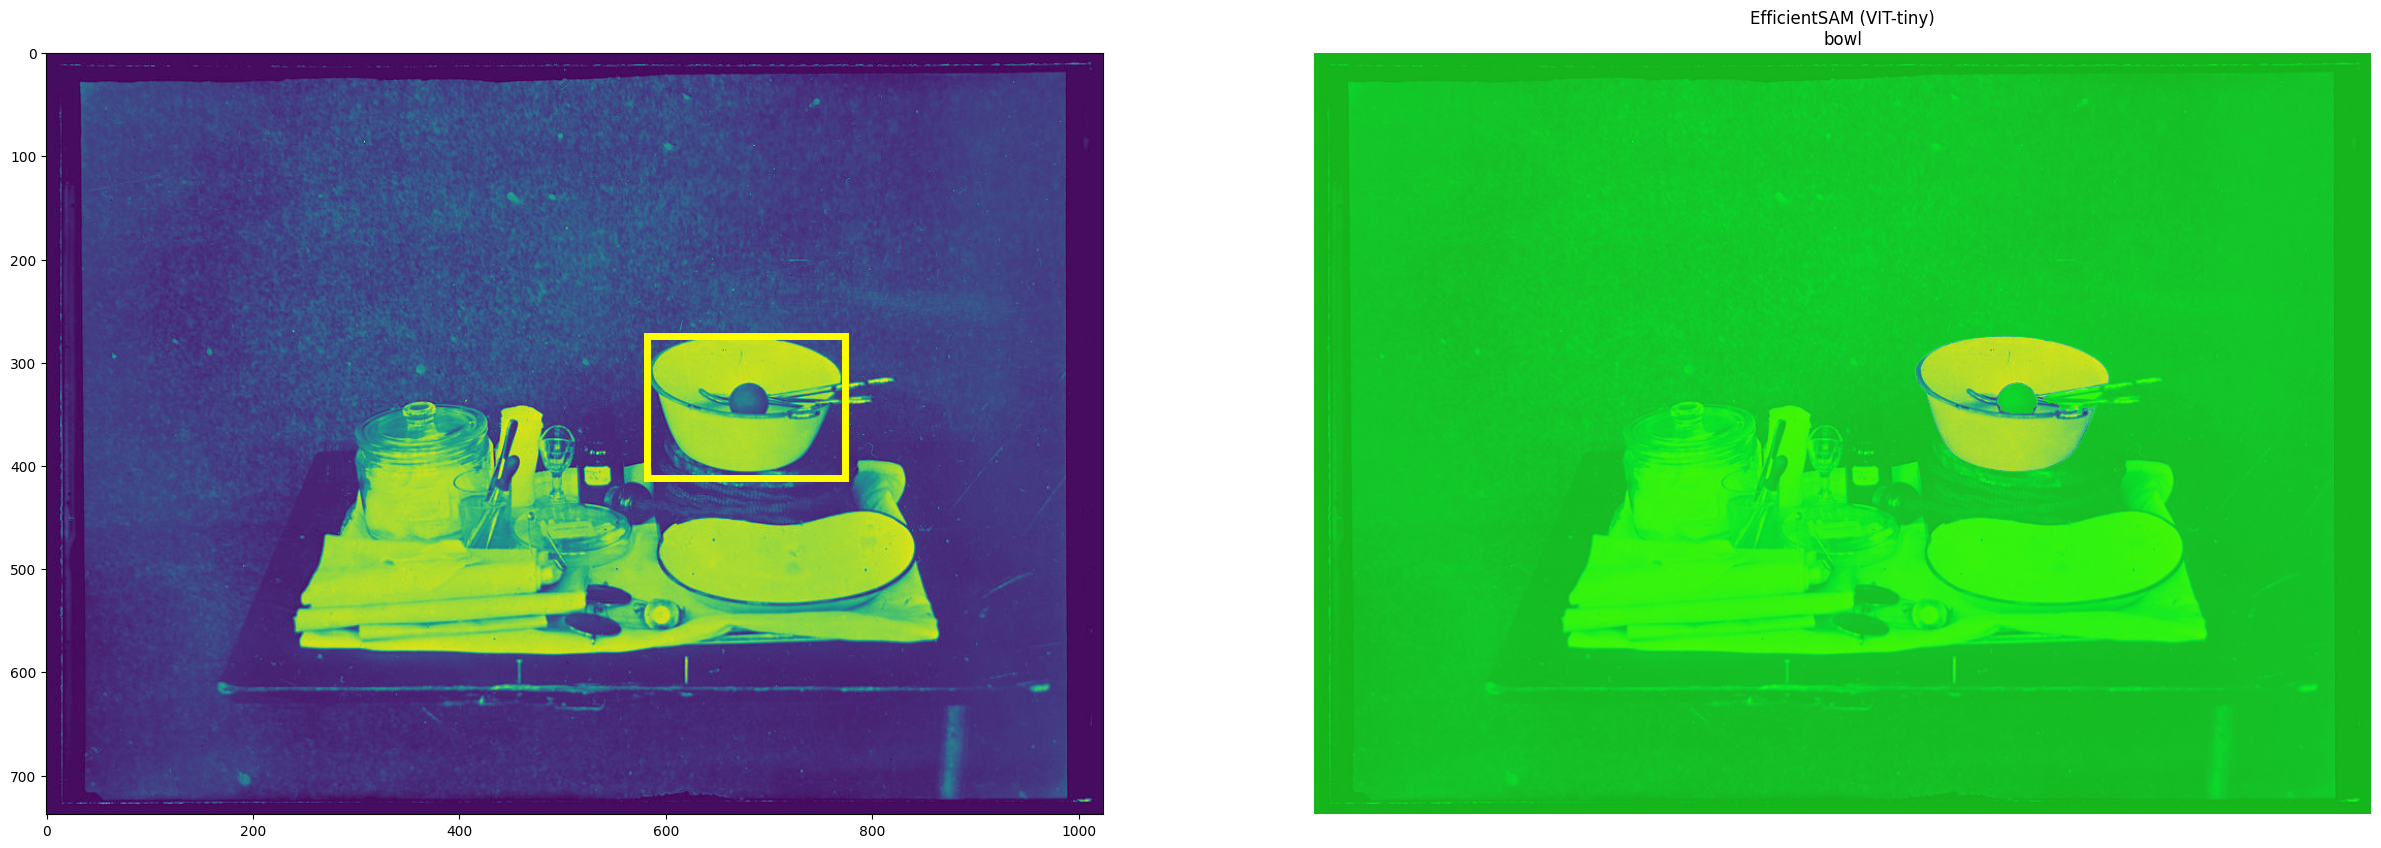

In [7]:
path_img = '/Users/aisaiahpellecer/Desktop/lclabs-jfp24/early_work/images/image_3.jpg'

img = read_image(path_img)

batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
# labels = [weights.meta["categories"][i] for i in prediction["labels"]]
# box = draw_bounding_boxes(
#     img, boxes=prediction["boxes"], labels=labels, colors="red", width=4, font_size=30
# )
# im = to_pil_image(box.detach())

x1=prediction['boxes'][0][0].item() 
y1=prediction['boxes'][0][1].item()
x2=prediction['boxes'][0][2].item() 
y2=prediction['boxes'][0][3].item() 
w=x2-x1
h=y2-y1

fig, ax = plt.subplots(1, 2, figsize=(30, 30))
input_point = np.array([[x1, y1], [x2, y2]])
input_label = np.array([2,3])
image_path = path_img
image = np.array(Image.open(image_path))
show_points(input_point, input_label, ax[0])
show_box([x1,y1,x2,y2], ax[0])
ax[0].imshow(image)

ax[1].imshow(image)
mask_efficient_sam_vitt = run_ours_box_or_points(image_path, input_point, input_label, efficient_sam_vitt_model)
show_anns_ours(mask_efficient_sam_vitt, ax[1])
ax[1].title.set_text(f"EfficientSAM (VIT-tiny)\n{weights.meta['categories'][prediction['labels'][0].item()]}")
ax[1].axis('off')

In [8]:
import numpy as np
from scipy.ndimage import binary_dilation, binary_erosion, binary_closing
from scipy.ndimage import binary_fill_holes

In [9]:
print(mask_efficient_sam_vitt)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [10]:
structuring_element = np.ones((25, 25), dtype=bool)
binary_mask = mask_efficient_sam_vitt
dilated_mask = binary_dilation(binary_mask, structure=structuring_element)
eroded_mask = binary_erosion(dilated_mask, structure=structuring_element)

(-0.5, 1023.5, 737.5, -0.5)

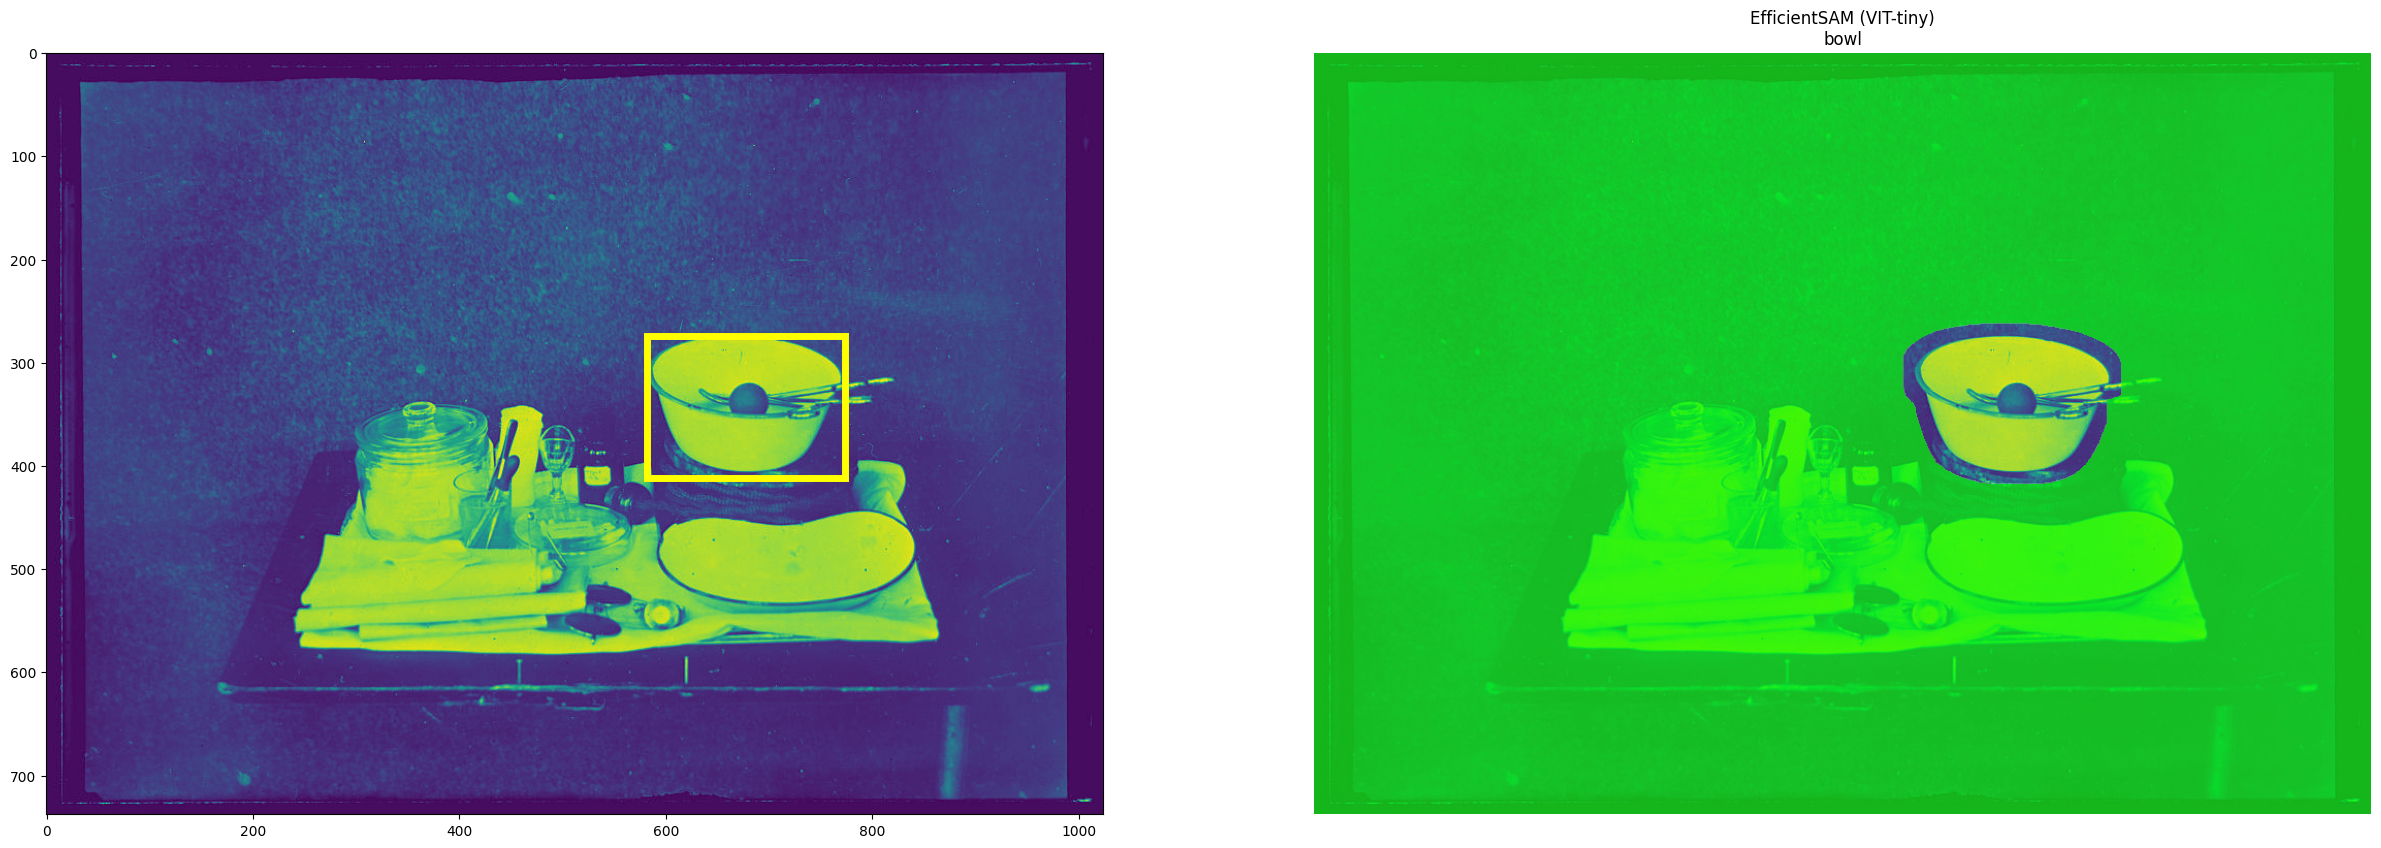

In [11]:
x1=prediction['boxes'][0][0].item() 
y1=prediction['boxes'][0][1].item()
x2=prediction['boxes'][0][2].item() 
y2=prediction['boxes'][0][3].item() 
w=x2-x1
h=y2-y1

fig, ax = plt.subplots(1, 2, figsize=(30, 30))
input_point = np.array([[x1, y1], [x2, y2]])
input_label = np.array([2,3])
image_path = path_img
image = np.array(Image.open(image_path))
show_points(input_point, input_label, ax[0])
show_box([x1,y1,x2,y2], ax[0])
ax[0].imshow(image)

ax[1].imshow(image)



show_anns_ours(dilated_mask, ax[1])
ax[1].title.set_text(f"EfficientSAM (VIT-tiny)\n{weights.meta['categories'][prediction['labels'][0].item()]}")
ax[1].axis('off')

In [12]:


eroded_mask = binary_fill_holes(eroded_mask, structure=structuring_element)


(-0.5, 1023.5, 737.5, -0.5)

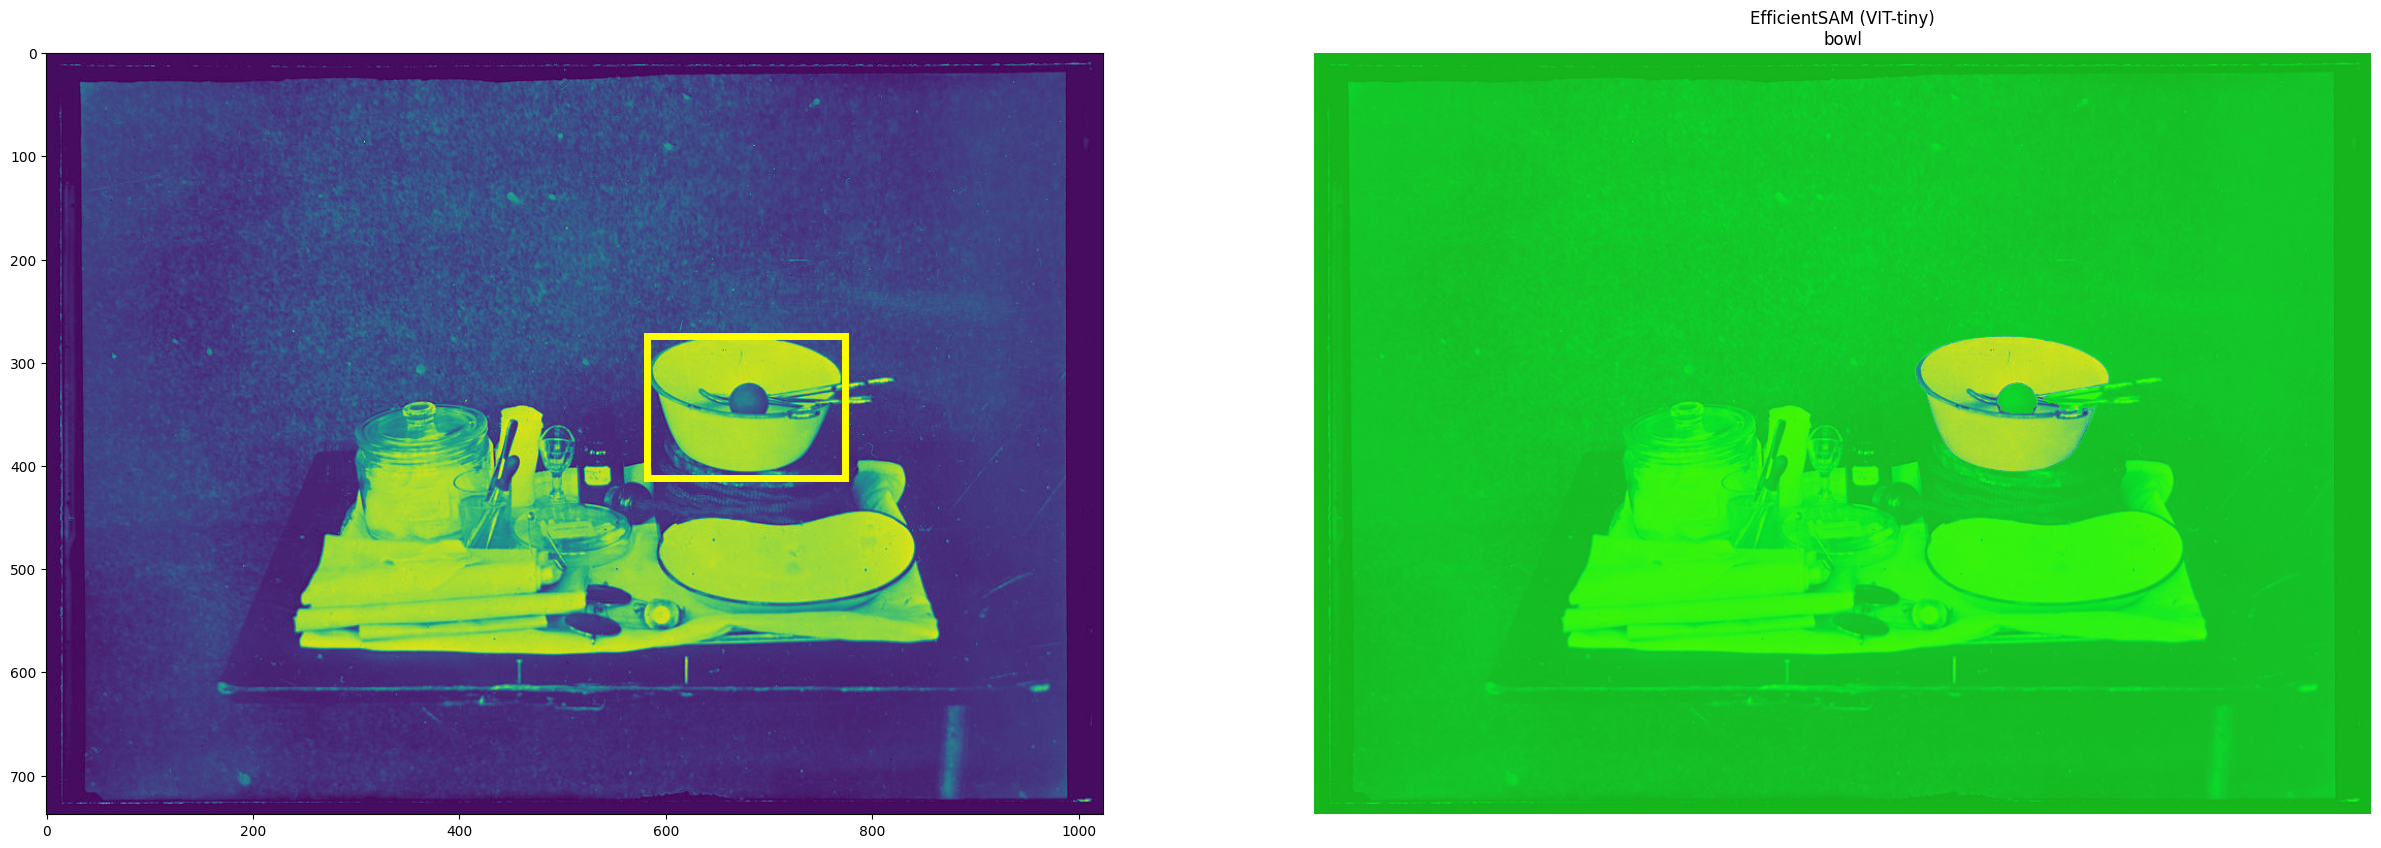

In [13]:
x1=prediction['boxes'][0][0].item() 
y1=prediction['boxes'][0][1].item()
x2=prediction['boxes'][0][2].item() 
y2=prediction['boxes'][0][3].item() 
w=x2-x1
h=y2-y1

fig, ax = plt.subplots(1, 2, figsize=(30, 30))
input_point = np.array([[x1, y1], [x2, y2]])
input_label = np.array([2,3])
image_path = path_img
image = np.array(Image.open(image_path))
show_points(input_point, input_label, ax[0])
show_box([x1,y1,x2,y2], ax[0])
ax[0].imshow(image)

ax[1].imshow(image)



show_anns_ours(binary_mask, ax[1])
ax[1].title.set_text(f"EfficientSAM (VIT-tiny)\n{weights.meta['categories'][prediction['labels'][0].item()]}")
ax[1].axis('off')

(-0.5, 1023.5, 737.5, -0.5)

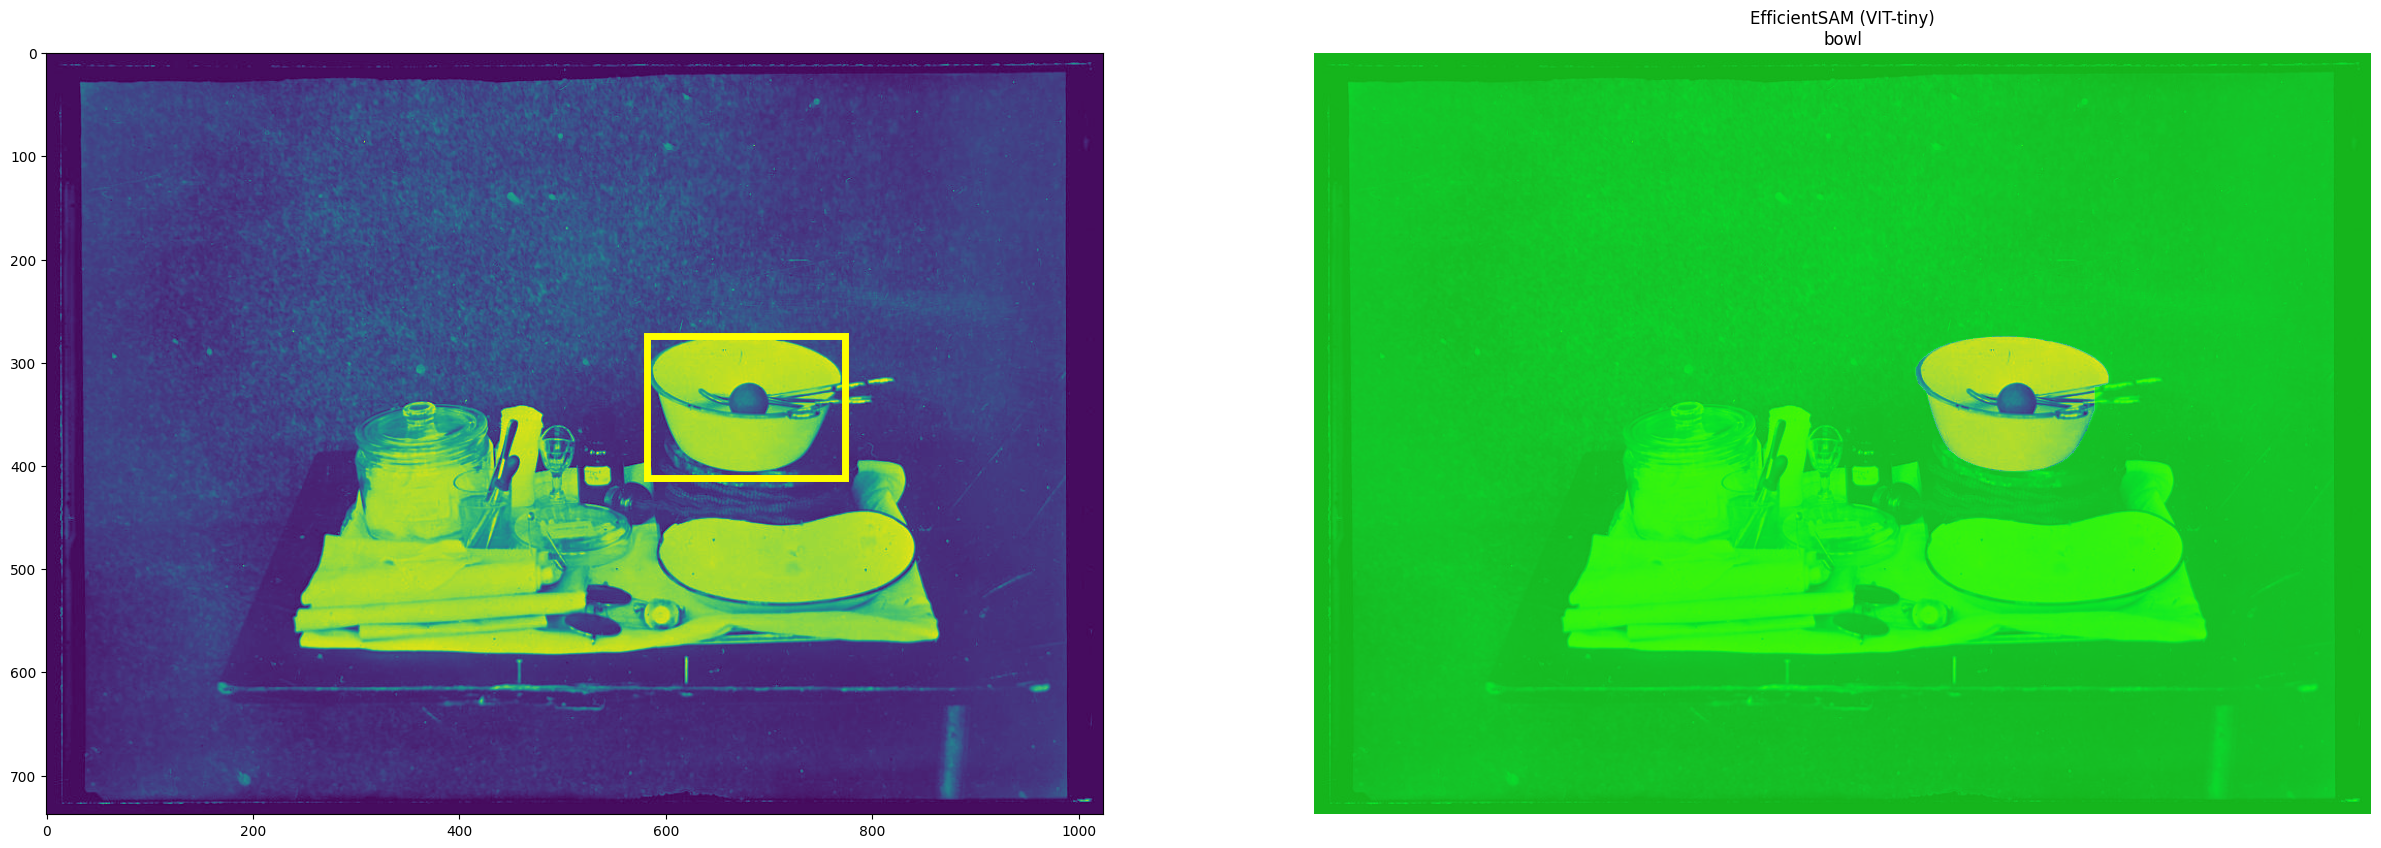

In [14]:
structuring_element = np.ones((30, 30), dtype=bool)
closed = binary_closing(binary_mask, structure=structuring_element)

# structuring_element = np.ones((25, 25), dtype=bool)
# binary_mask = mask_efficient_sam_vitt
# dilated_mask = binary_dilation(binary_mask, structure=structuring_element)


filled = binary_fill_holes(binary_mask, structure=structuring_element)
x1=prediction['boxes'][0][0].item() 
y1=prediction['boxes'][0][1].item()
x2=prediction['boxes'][0][2].item() 
y2=prediction['boxes'][0][3].item() 
w=x2-x1
h=y2-y1

fig, ax = plt.subplots(1, 2, figsize=(30, 30))
input_point = np.array([[x1, y1], [x2, y2]])
input_label = np.array([2,3])
image_path = path_img
image = np.array(Image.open(image_path))
show_points(input_point, input_label, ax[0])
show_box([x1,y1,x2,y2], ax[0])
ax[0].imshow(image)

ax[1].imshow(image)



show_anns_ours(closed, ax[1])
ax[1].title.set_text(f"EfficientSAM (VIT-tiny)\n{weights.meta['categories'][prediction['labels'][0].item()]}")
ax[1].axis('off')

In [15]:
show_anns_ours(closed, ax[1])


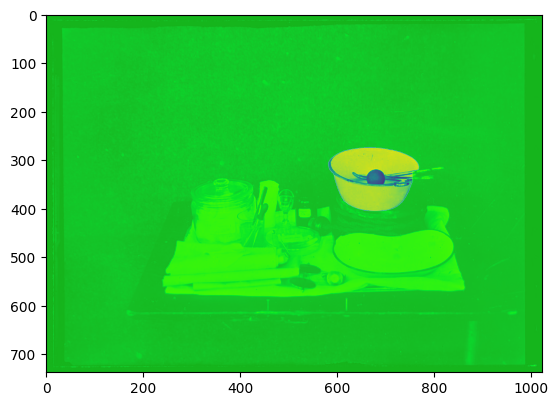

In [16]:
fig, ax = plt.subplots()
ax.imshow(image)
show_anns_ours(closed, ax)
plt.show()

In [17]:
import cv2
os.chdir("/Users/aisaiahpellecer/Desktop/lclabs-jfp24/early_work")


In [18]:
os.listdir("/Users/aisaiahpellecer/Desktop/lclabs-jfp24/early_work")


['.DS_Store',
 'download_images_and_resource_ids.ipynb',
 'object_detection_notebooks',
 'images',
 'closed_image_15.png',
 'efficient_sam',
 'ftu-dc-images',
 'evaluation',
 'generate_images.ipynb',
 'fonts',
 'helpers.py',
 'model_evaluations.ipynb']

In [28]:
def process_image(path_img, structuring_value=25):
    # Read the image
    img = read_image(path_img)
    batch = [preprocess(img)]
    # Get prediction from the model
    prediction = model(batch)[0]
    
    if len(prediction['labels']) == 0:
        print('No Object Detection predictions within the Scope of MS COCO dataset')

    else:
    # Previously, i had incorporated a way to select the object for extracion
    # dict_items = {}
    # for i in range(len(prediction['labels'])):
    #     dict_items[i] = weights.meta['categories'][prediction['labels'][i].item()]
    #     # print(weights.meta['categories'][prediction['labels'][i].item()] + f':{i}')
    # print(dict_items)
    # print('input item # from dict of interest')
    # x = int(input()) 
    # ignoring the input function and just setting x to 0 to show the top result, if exists.
        name = os.path.basename(path_img).split('.')[0]
        # print('generating mask for first object in: ' + name)
        x = 0
                

        # Extract bounding box coordinates
        x1 = prediction['boxes'][x][0].item()
        y1 = prediction['boxes'][x][1].item()
        x2 = prediction['boxes'][x][2].item()
        y2 = prediction['boxes'][x][3].item()
        w = x2 - x1
        h = y2 - y1
        
        # fig, ax = plt.subplots(1, 3, figsize=(30, 30))
        input_point = np.array([[x1, y1], [x2, y2]])
        input_label = np.array([2, 3])
        

        mask_efficient_sam_vitt = run_ours_box_or_points(path_img, input_point, input_label, efficient_sam_vitt_model)
        # show_anns_ours(mask_efficient_sam_vitt, ax[1])
        binary_mask = mask_efficient_sam_vitt
        structuring_element = np.ones((structuring_value,structuring_value), dtype=bool)
        dilated_mask = binary_dilation(binary_mask, structure=structuring_element)
        eroded_mask = binary_erosion(dilated_mask, structure=structuring_element)

        closed_mask_uint8 = (eroded_mask * 255).astype(np.uint8)
        cv2.imwrite(f'closed_{name}.png', closed_mask_uint8)

        img_val = cv2.imread(path_img)
        mask = cv2.imread(f'../masks/closed_{name}.png')

        img_foreground = np.array((mask/255)*(img_val/255)) * img_val
        cv2.imwrite(f'../cutouts/extraction_{name}.png', img_foreground)


In [20]:
# import cv2
# closed_mask_uint8 = (dilated_mask * 255).astype(np.uint8)
# cv2.imwrite('closed_mask.png', closed_mask_uint8)


# img = cv2.imread(path_img)
# mask = cv2.imread('/Users/aisaiahpellecer/Desktop/lclabs-jfp24/early_work/efficient_sam/cutouts/closed_mask.png')

# img_foreground = np.array((mask/255)*(img/255)) * img
# cv2.imwrite('extraction.png', img_foreground)

In [21]:
os.chdir("/Users/aisaiahpellecer/Desktop/lclabs-jfp24/early_work")


In [23]:
print (os.getcwd())

/Users/aisaiahpellecer/Desktop/lclabs-jfp24/early_work


In [29]:
for image in os.listdir('ftu-dc-images')[:10]:
    path = "ftu-dc-images/" + image
    # print(path)
    process_image(path)

KeyboardInterrupt: 